In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def gaussian_elimination(A, b):

    n = len(b)
    for i in range(n):
        max_row = np.argmax(np.abs(A[i:, i])) + i
        if i != max_row:
            A[[i, max_row]] = A[[max_row, i]]
            b[[i, max_row]] = b[[max_row, i]]
              
        for j in range(i+1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] = A[j, i:] - factor * A[i, i:]
            b[j] = b[j] - factor * b[i]
    
    x = np.zeros_like(b)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
    
    return x

In [3]:
def gauss_elim(N):
    
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    dx = 1 / (N - 1)
    dy = 1 / (N - 1)
    
    A = np.zeros((N*N, N*N))
    b = np.zeros(N*N)
    
    for j in range(N):
        for i in range(N):
            k = j*N + i
            
            if i == 0:
                # boundary conditon on the left side
                phi_x0 = 500 * np.exp(-50 * (1 + y[j]**2))
                A[k, k] = 1
                b[k] = phi_x0
            elif i == N-1:
                # boundary conditon on the right side
                phi_x1 = 100 * (1 - y[j]) + 500 * np.exp(-50 * y[j]**2)
                A[k, k] = 1
                b[k] = phi_x1
            elif j == 0:
                # boundary condition down
                phi_y0 = 100 * x[i] + 500 * np.exp(-50 * (1 - x[i])**2)
                A[k, k] = 1
                b[k] = phi_y0
            elif j == N-1:
                # boundary condition up
                phi_y1 = 500 * np.exp(-50 * ((1 - x[i])**2 + 1))
                A[k, k] = 1
                b[k] = phi_y1
            else:
                # considering the Internal grid points and filling up the A
                A[k, k] = -4  # Main diagonal
                
                # Left and right elements of the main daigonal
                if i > 0:
                    A[k, k-1] = 1
                if i < N-1:
                    A[k, k+1] = 1 
                
                # vertical neighbouring elements af the  main diagonal
                if j > 0:
                    A[k, k-N] = 1  # Bottom neighbor
                if j < N-1:
                    A[k, k+N] = 1  # Top neighbor
                
                # Source term
                b[k] = 50000 * np.exp(-50 * ((1 - x[i])**2 + y[j]**2)) * (100 * ((1 - x[i])**2 + y[j]**2) - 2)*dx**2

    
    # Solve the system using Gaussian elimination
    start_time = time.time()
    phi = gaussian_elimination(A, b)
    end_time = time.time()
    
    phi = phi.reshape((N, N))
    
    return phi, end_time - start_time

In [4]:
def plot_grid_points(N):
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    X, Y = np.meshgrid(x, y)
    
    plt.figure(figsize=(8, 6))
    plt.plot(X, Y, 'ko', markersize=4)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Domain with {N}x{N} Grid Points')
    plt.grid(True)
    plt.show()

In [5]:
def plot_contour(phi, N):
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    X, Y = np.meshgrid(x, y)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, phi, 50, cmap='viridis')
    plt.colorbar(label='Phi')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Contour plot of Phi with {N}x{N} grid')
    plt.show()

Solving for 21x21 grid...


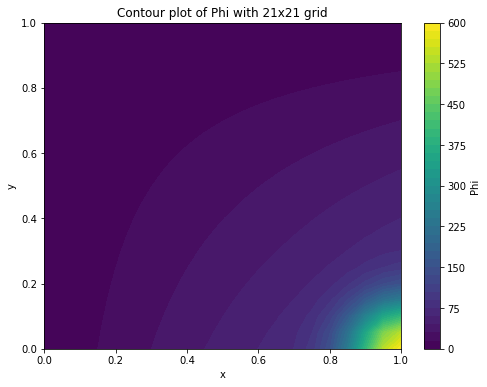

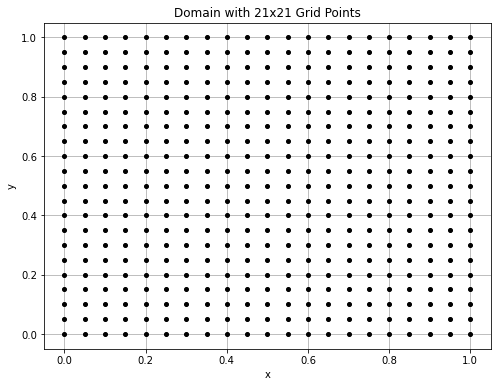

Solving for 41x41 grid...


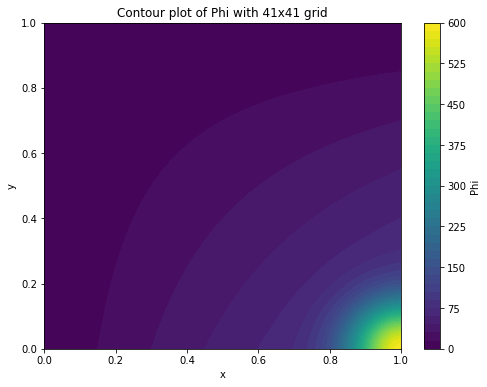

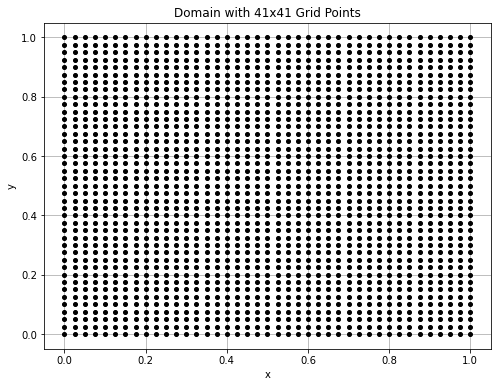

Solving for 81x81 grid...


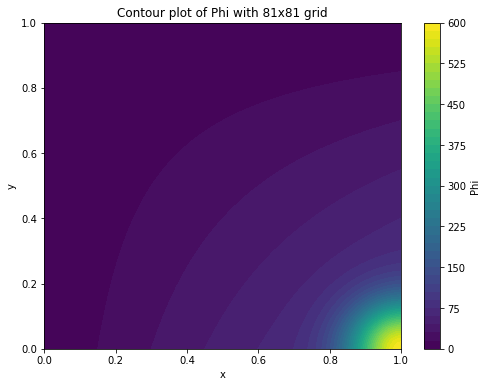

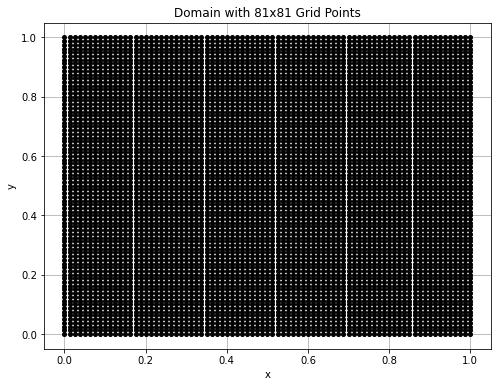

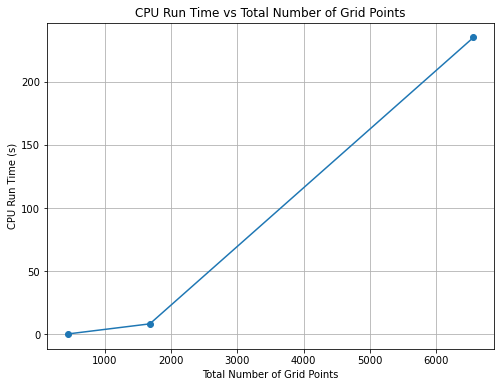

In [6]:
def main():
    grids = [21, 41, 81]
    run_times = []
    
    for N in grids:
        print(f'Solving for {N}x{N} grid...')
        phi, run_time = gauss_elim(N)
        run_times.append(run_time)
        plot_contour(phi, N)
        plot_grid_points(N)
    
    # Plotting CPU run time vs number of grid points
    plt.figure(figsize=(8, 6))
    plt.plot([N**2 for N in grids], run_times, marker='o')
    plt.xlabel('Total Number of Grid Points')
    plt.ylabel('CPU Run Time (s)')
    plt.title('CPU Run Time vs Total Number of Grid Points')
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    main()